In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
housing = pd.read_csv("housing2.csv" , sep = "," , encoding = 'utf-8')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [4]:
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

<AxesSubplot:>

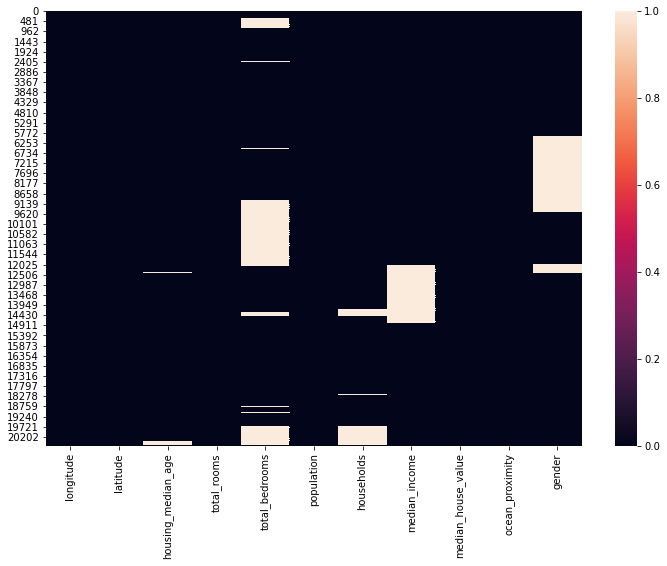

In [5]:
plt.figure(figsize= (12,8))
sns.heatmap(housing.isnull())

In [6]:
datana=housing.copy()
data=housing.dropna()

In [7]:
data['households'] = data['households'].astype(float)

<ipython-input-7-7476cfe38bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['households'] = data['households'].astype(float)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10177 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10177 non-null  float64
 1   latitude            10177 non-null  float64
 2   housing_median_age  10177 non-null  float64
 3   total_rooms         10177 non-null  int64  
 4   total_bedrooms      10177 non-null  float64
 5   population          10177 non-null  float64
 6   households          10177 non-null  float64
 7   median_income       10177 non-null  float64
 8   median_house_value  10177 non-null  int64  
 9   ocean_proximity     10177 non-null  object 
 10  gender              10177 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 954.1+ KB


<AxesSubplot:>

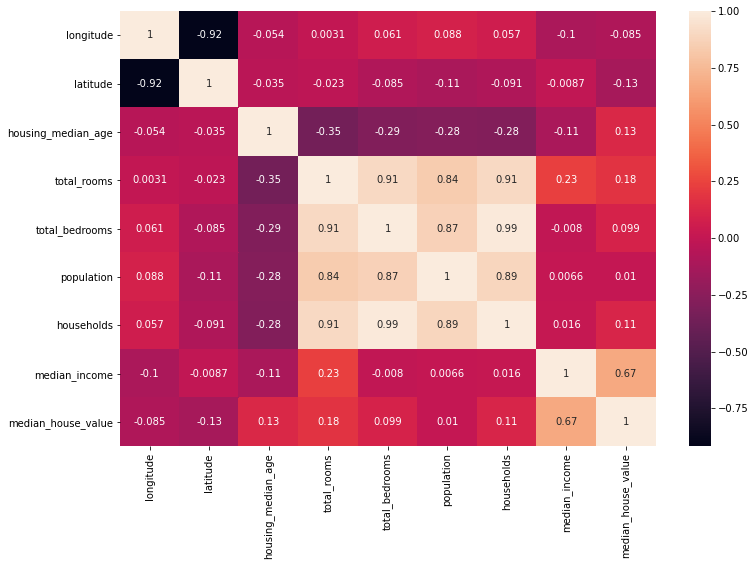

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr() , annot = True)

# filling missing data for housing_median age

In [10]:
datana['housing_median_age'].fillna(method='bfill',inplace=True)

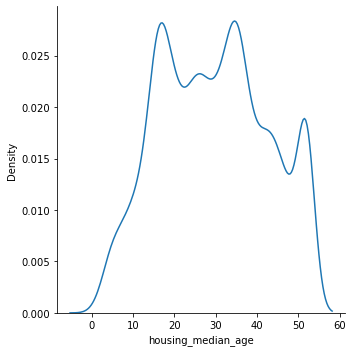

In [11]:
sns.displot(data=data, x="housing_median_age", kind="kde")

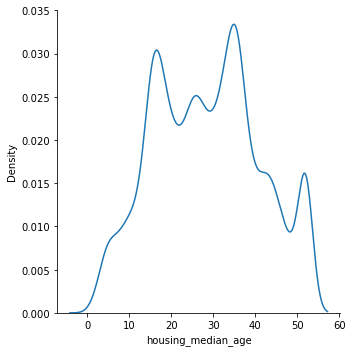

In [12]:
sns.displot(data=datana, x="housing_median_age", kind="kde")

# filling missing data for total_bedrooms 

In [13]:
x = data['total_rooms'].mean()/data['total_bedrooms'].mean()
x

4.819187052079389

In [14]:
def bedrooms(row):
    if (row['total_bedrooms']>0):
        bedroom = row['total_bedrooms']
        return bedroom
    else:
        bedroom  = row['total_rooms']/x
        return bedroom

In [15]:
datana['total_bedrooms'] = datana.apply(bedrooms , axis = 1)

In [16]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

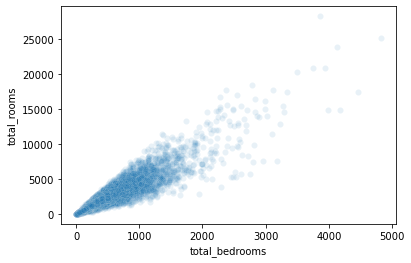

In [17]:
sns.scatterplot(data=data, x="total_bedrooms", y="total_rooms", alpha=.1)

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

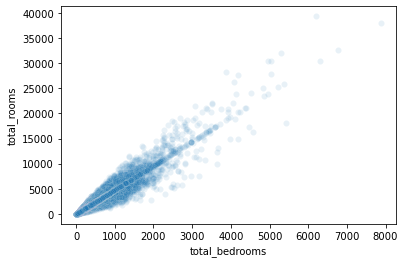

In [18]:
sns.scatterplot(data=datana, x="total_bedrooms", y="total_rooms", alpha=.1)

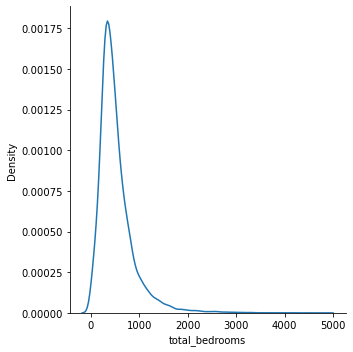

In [19]:
sns.displot(data=data, x="total_bedrooms", kind="kde")

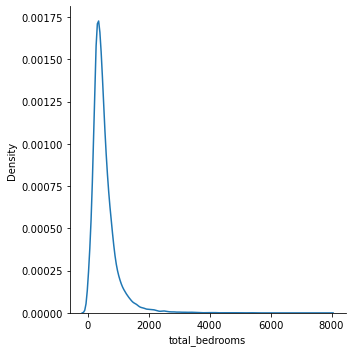

In [20]:
sns.displot(data=datana, x="total_bedrooms", kind="kde")

# filling missing data for population 

In [21]:
x = data['population'].mean()/data['total_bedrooms'].mean()
x

2.6170216920933136

In [22]:
def population(row):
    if (row['population']>0):
        population = row['population']
        return population
    else:
        bedroom  = row['total_bedrooms']*x
        return bedroom

In [23]:
datana['population'] = datana.apply(population , axis = 1)

In [24]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='total_bedrooms', ylabel='population'>

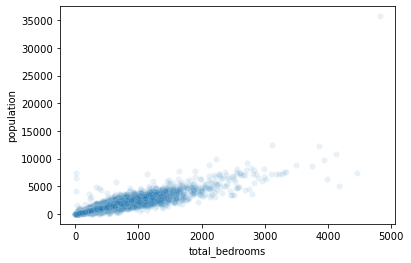

In [25]:
sns.scatterplot(data=data, x="total_bedrooms", y="population",alpha=.1)

<AxesSubplot:xlabel='total_bedrooms', ylabel='population'>

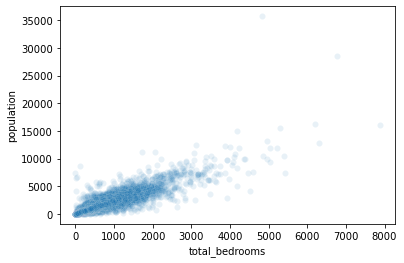

In [26]:
sns.scatterplot(data=datana, x="total_bedrooms", y="population",alpha=.1)

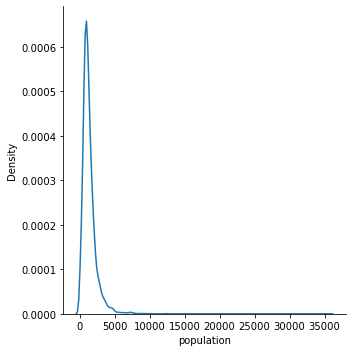

In [27]:
sns.displot(data=data, x="population", kind="kde")

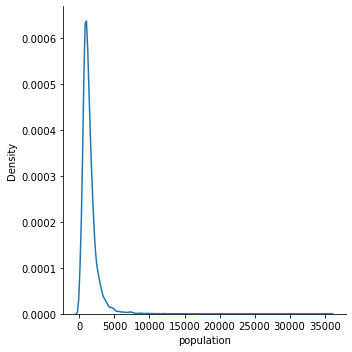

In [28]:
sns.displot(data=datana, x="population", kind="kde")

# filling missing data & casting into float for households 

In [29]:
datana['households'].value_counts()[:5].index.tolist()

['no', '282', '375', '306', '380']

In [30]:
datana['households'] = datana['households'].replace(['no'],'0')

In [31]:
datana['households']=datana['households'].astype(float)

In [32]:
def household(row):
    if (row['households']>0):
        household = row['households']
        return household
    else:
        household  = int(row['total_bedrooms'])
        return household

In [33]:
datana['households'] =datana.apply(household,axis=1)

In [34]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


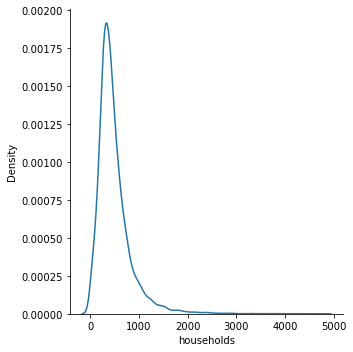

In [35]:
sns.displot(data=data, x="households", kind="kde")

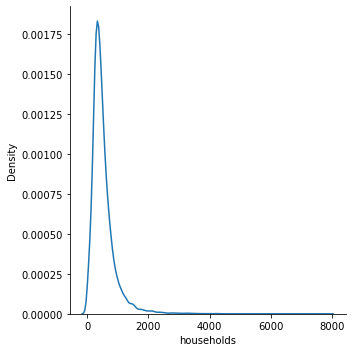

In [36]:
sns.displot(data=datana, x="households", kind="kde")

<AxesSubplot:xlabel='households', ylabel='population'>

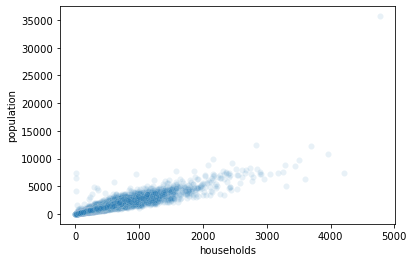

In [37]:
sns.scatterplot(data=data, x="households", y="population",alpha=.1)

<AxesSubplot:xlabel='households', ylabel='population'>

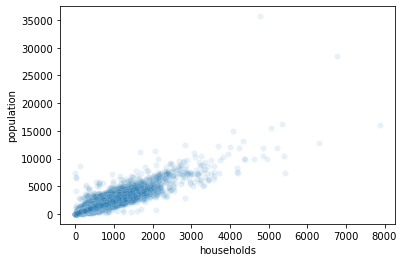

In [38]:
sns.scatterplot(data=datana, x="households", y="population",alpha=.1)

# filling missing data for median_income 

In [39]:
fill_list = data['median_income'].tolist()
datana['median_income'] = datana['median_income'].fillna(pd.Series(np.random.choice(fill_list , size = len(datana.index))))

In [40]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


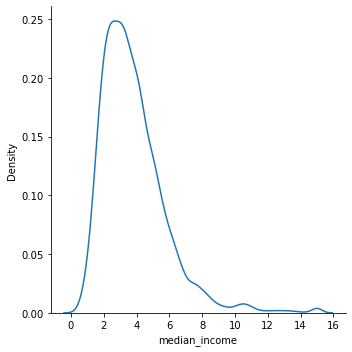

In [41]:
sns.displot(data=data, x="median_income", kind="kde")

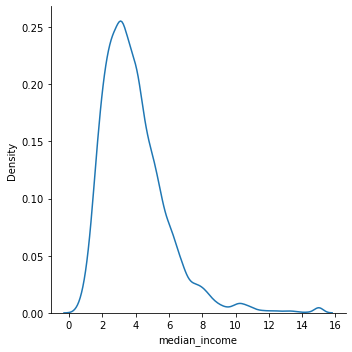

In [42]:
sns.displot(data=datana, x="median_income", kind="kde")

# filling missing data for gender 

In [43]:
fill_list = ['female' , 'male']
datana['gender'] = datana['gender'].fillna(pd.Series(np.random.choice(fill_list , size = len(housing.index))))

In [44]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              20640 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


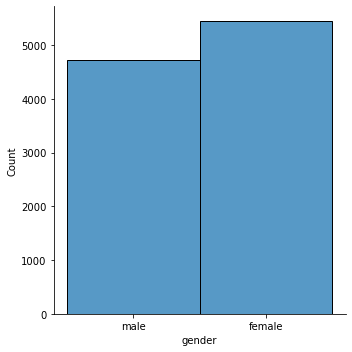

In [45]:
sns.displot(data=data, x="gender")

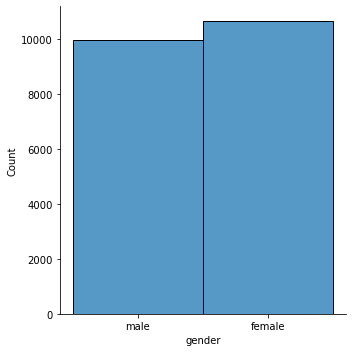

In [46]:
sns.displot(data=datana, x="gender")

In [47]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

# label encoding

In [48]:
gender_le = LabelEncoder()
ocean_proximity_le = LabelEncoder()

In [49]:
datana['gender'] = gender_le.fit_transform(datana['gender'])
datana['ocean_proximity'] = gender_le.fit_transform(datana['ocean_proximity'])

In [50]:
datana

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.000000,126.0,8.3252,452600,3,1
1,-122.22,37.86,21.0,7099,1106.0,2401.000000,1138.0,8.3014,358500,3,0
2,-122.24,37.85,52.0,1467,190.0,496.000000,177.0,7.2574,352100,3,1
3,-122.25,37.85,52.0,1274,235.0,558.000000,219.0,5.6431,341300,3,0
4,-122.25,37.85,42.0,1627,280.0,732.766074,259.0,3.8462,342200,3,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.000000,330.0,1.5603,78100,1,0
20636,-121.21,39.49,18.0,697,150.0,356.000000,114.0,2.5568,77100,1,1
20637,-121.22,39.43,17.0,2254,485.0,1007.000000,433.0,1.7000,92300,1,0
20638,-121.32,39.43,18.0,1860,409.0,741.000000,349.0,1.8672,84700,1,1


In [51]:
housing=datana.copy()

In [52]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.000000,126.0,8.3252,452600,3,1
1,-122.22,37.86,21.0,7099,1106.0,2401.000000,1138.0,8.3014,358500,3,0
2,-122.24,37.85,52.0,1467,190.0,496.000000,177.0,7.2574,352100,3,1
3,-122.25,37.85,52.0,1274,235.0,558.000000,219.0,5.6431,341300,3,0
4,-122.25,37.85,42.0,1627,280.0,732.766074,259.0,3.8462,342200,3,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.000000,330.0,1.5603,78100,1,0
20636,-121.21,39.49,18.0,697,150.0,356.000000,114.0,2.5568,77100,1,1
20637,-121.22,39.43,17.0,2254,485.0,1007.000000,433.0,1.7000,92300,1,0
20638,-121.32,39.43,18.0,1860,409.0,741.000000,349.0,1.8672,84700,1,1


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
 10  gender              20640 non-null  int32  
dtypes: float64(7), int32(2), int64(2)
memory usage: 1.6 MB
